In [1]:
%%time
import pandas as pd
import numpy as np
import ipyparallel as ipp
#import pymc3 as mc

CPU times: user 673 ms, sys: 93.6 ms, total: 766 ms
Wall time: 2.84 s


In [2]:
df=pd.read_table('multivsamp.csv',sep=';')
df.head()

,id2,IM_MAX_SDO_MEDIO_12M,IM_PROM_HIPOTECA_12M,IM_PROM_PREST_NOM_12M,IM_PROM_AUTO_12M,IM_PROM_PPIS_12M,IM_PROM_OTRO_12M,IM_PROM_CARTERA_12M,IM_PROM_SDO_CORTE_12M,IM_PROM_SDO_MEDIO_12M,...,TP_PERSONA,TP_DOMICILIO,CD_ESTADO,CD_EDO_CIVIL,CD_SEGMENTACION,CD_SEXO,CD_OCUPACION,CD_RESIDENCIA,TP_VIVIENDA_SEPO,contrata
0,1,1100.00,0.0,0.000,0.0,0.0,0.0,0.0,0.00,1100.00,...,F,H,NL,C,R1,M,SER,MEX,NaN,0
1,5,22836.13,0.0,2445.065,0.0,0.0,0.0,0.0,2633.32,8718.87,...,F,H,DF,S,B1,M,MED,MEX,CASA,0
2,16,5936.92,0.0,90829.800,0.0,0.0,0.0,0.0,74654.69,1547.00,...,F,H,SI,C,F9,F,ASG,MEX,CASA,0
3,17,541013.76,0.0,0.000,0.0,0.0,0.0,0.0,0.00,498718.13,...,F,H,NaN,C,Q1,F,PEN,MEX,NaN,0
4,62,5059.81,0.0,0.000,0.0,0.0,0.0,0.0,0.00,2682.58,...,F,H,NL,C,B1,M,PEN,MEX,NaN,0


In [3]:
df['contrata'].mean()

0.011762037089548007

In [4]:
seg='TP_SEGMENTO_FINAL2'
seg2='CD_SEGMENTACION'

In [5]:
#%px
rev=df[[seg,seg2,'id2','contrata']].groupby([seg,seg2]).aggregate({'contrata':'sum'})
rev

contrata
TP_SEGMENTO_FINAL2     CD_SEGMENTACION          
ADULTO EN PLENITUD     B1                    113
                       BC                      8
                       D1                      0
                       E0                      0
                       E2                      0
                       F2                      0
                       F5                      0
                       F9                     32
                       G0                      0
                       N1                      0
                       P0                      0
                       P1                      0
                       P2                      1
                       P3                      1
                       Q1                     63
                       R1                     29
                       R2                     18
                       R4                      2
                       R5                      0
                       S1                      0
ADULTOS INDEPENDIENTES B1                    118
                       B5                      0
                       BB                      0
                       BC                      3
                       C0                      0
                       D1                      0
                       D9                      0
                       E0                      0
                       F2                      0
                       F4                      0
...                                          ...
RETIRADOS              F5                      0
                       F8                      0
                       F9                      2
                       P2                      0
                       P3                      0
                       Q1                      6
                       R1                      1
                       R2                      1
                       R4                      0
                       R5                      0
SIN SEGMENTO           B1                     15
                       BC                      0
                       D1                      0
                       D9                      0
                       E0                      0
                       F2                      0
                       F8                      0
                       F9                      8
                       N1                      0
                       P3                      0
                       Q1                      2
                       R1                     19
                       R2                      0
                       R5                      0
                       S1                      1
                       SS                      0
SIN_EDAD               B1                      0
                       F9                      0
                       Q1                      0
                       R1                      0

[236 rows x 1 columns]

In [6]:
df=df[[seg,seg2,'contrata','TO_PROM_TO_CARGOS_3M','NU_VINC_COGNODATA','TO_NECESIDAD_FINAN_CAP_3M','IM_PROM_GASTOS_3M','IM_MAX_SDO_MEDIO_12M']]

In [7]:
rev=rev[rev['contrata']>=50]
rev

contrata
TP_SEGMENTO_FINAL2     CD_SEGMENTACION          
ADULTO EN PLENITUD     B1                    113
                       Q1                     63
ADULTOS INDEPENDIENTES B1                    118
DIVORCIADO             B1                     56
HOGARES CON HIJOS      B1                    266
                       F9                     83
                       Q1                    130
JOVEN PROFESIONAL      B1                    112
JOVEN TRABAJADOR       B1                     50
PAREJA JOVEN           B1                     95
PAREJAS ADULTAS        B1                    108
PAREJAS SENIOR         B1                    127

In [8]:
#df[seg]+df[seg2]
#rev.index[19][0]+rev.index[19][1]
tab=list(rev.index[i][0]+rev.index[i][1] for i in range(len(rev)))


In [9]:
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np
import theano.tensor as t
from scipy.stats import mode
def tinvlogit(x):
    return t.exp(x) / (1 + t.exp(x))
df.head()

Couldn't import dot_parser, loading of dot files will not be possible.


,TP_SEGMENTO_FINAL2,CD_SEGMENTACION,contrata,TO_PROM_TO_CARGOS_3M,NU_VINC_COGNODATA,TO_NECESIDAD_FINAN_CAP_3M,IM_PROM_GASTOS_3M,IM_MAX_SDO_MEDIO_12M
0,PAREJAS ADULTAS,R1,0,0.000000,1,0.000000,0.000000,1100.00
1,ADULTOS INDEPENDIENTES,B1,0,8.333333,4,5.431283,115592.358890,22836.13
2,JOVEN PROFESIONAL,F9,0,9.666667,14,544.893976,583913.833340,5936.92
3,RETIRADOS,Q1,0,16.666667,5,0.038541,18776.530000,541013.76
4,RETIRADOS,B1,0,1.000000,1,1.821699,7166.666667,5059.81


In [10]:
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np
import theano.tensor as t
from scipy.stats import mode
def tinvlogit(x):
    return t.exp(x) / (1 + t.exp(x))
df.head()
#df=pd.read_csv('/home/ryan/Documents/thads2013n.txt',sep=',') df=df[df['BURDEN']>0] df=df[df['AGE1']>0] df['OWN']=[1 if obj=='2' else 0 for obj in df['OWNRENT']]

,TP_SEGMENTO_FINAL2,CD_SEGMENTACION,contrata,TO_PROM_TO_CARGOS_3M,NU_VINC_COGNODATA,TO_NECESIDAD_FINAN_CAP_3M,IM_PROM_GASTOS_3M,IM_MAX_SDO_MEDIO_12M
0,PAREJAS ADULTAS,R1,0,0.000000,1,0.000000,0.000000,1100.00
1,ADULTOS INDEPENDIENTES,B1,0,8.333333,4,5.431283,115592.358890,22836.13
2,JOVEN PROFESIONAL,F9,0,9.666667,14,544.893976,583913.833340,5936.92
3,RETIRADOS,Q1,0,16.666667,5,0.038541,18776.530000,541013.76
4,RETIRADOS,B1,0,1.000000,1,1.821699,7166.666667,5059.81


In [11]:
%matplotlib inline
'''df=df[df['TP_SEGMENTO_FINAL2'].isin(['ADULTO EN PLENITUD', 'ADULTOS INDEPENDIENTES', 'DIVORCIADO',
       'HOGARES CON HIJOS',
       'JOVEN PROFESIONAL', 'JOVEN TRABAJADOR', 'PAREJA JOVEN',
       'PAREJAS ADULTAS', 'PAREJAS SENIOR'])]
'''      
#df=df[df[seg].isin(rev.index)]
df=df[(df[seg]+df[seg2]).isin(tab)]

In [12]:
df=df.fillna(0)
df.head()

,TP_SEGMENTO_FINAL2,CD_SEGMENTACION,contrata,TO_PROM_TO_CARGOS_3M,NU_VINC_COGNODATA,TO_NECESIDAD_FINAN_CAP_3M,IM_PROM_GASTOS_3M,IM_MAX_SDO_MEDIO_12M
1,ADULTOS INDEPENDIENTES,B1,0,8.333333,4,5.431283,115592.358890,22836.13
5,HOGARES CON HIJOS,B1,0,10.666667,9,14.605193,257359.420910,39304.27
7,HOGARES CON HIJOS,B1,0,0.000000,2,0.000000,0.000000,0.00
8,HOGARES CON HIJOS,B1,0,2.666667,6,16.193335,60828.104444,66232.62
9,PAREJAS ADULTAS,B1,0,4.666667,4,45.471708,456604.613200,85668.20


new={'ADULTO EN PLENITUD':1, 'ADULTOS INDEPENDIENTES':2, 'DIVORCIADO':3,
       'HOGARES CON HIJOS':4,
       'JOVEN PROFESIONAL':5, 'JOVEN TRABAJADOR':6, 'PAREJA JOVEN':7,
       'PAREJAS ADULTAS':8, 'PAREJAS SENIOR':9}

In [13]:
cate=(df[seg]+df[seg2]).unique()#df[seg].unique()
#cate[0]
#np.where(cate=='M')[0]
new={x:(np.where(cate==x)[0][0])+1 for x in cate}
new
#{'B':1, 'C':2, 'D':3,'S':4,'U':5, 'V':6, 'X':7}

{'ADULTO EN PLENITUDB1': 9,
 'ADULTO EN PLENITUDQ1': 11,
 'ADULTOS INDEPENDIENTESB1': 1,
 'DIVORCIADOB1': 8,
 'HOGARES CON HIJOSB1': 2,
 'HOGARES CON HIJOSF9': 12,
 'HOGARES CON HIJOSQ1': 7,
 'JOVEN PROFESIONALB1': 4,
 'JOVEN TRABAJADORB1': 6,
 'PAREJA JOVENB1': 10,
 'PAREJAS ADULTASB1': 3,
 'PAREJAS SENIORB1': 5}

In [14]:
#new['ADULTO EN PLENITUD']
df['Segmento']=(df[seg]+df[seg2]).apply(lambda x: new[x])
df.head()

,TP_SEGMENTO_FINAL2,CD_SEGMENTACION,contrata,TO_PROM_TO_CARGOS_3M,NU_VINC_COGNODATA,TO_NECESIDAD_FINAN_CAP_3M,IM_PROM_GASTOS_3M,IM_MAX_SDO_MEDIO_12M,Segmento
1,ADULTOS INDEPENDIENTES,B1,0,8.333333,4,5.431283,115592.358890,22836.13,1
5,HOGARES CON HIJOS,B1,0,10.666667,9,14.605193,257359.420910,39304.27,2
7,HOGARES CON HIJOS,B1,0,0.000000,2,0.000000,0.000000,0.00,2
8,HOGARES CON HIJOS,B1,0,2.666667,6,16.193335,60828.104444,66232.62,2
9,PAREJAS ADULTAS,B1,0,4.666667,4,45.471708,456604.613200,85668.20,3


In [15]:
# %load std_ipython_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import theano.tensor as tt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from scipy.stats import beta
from scipy.special import expit
from matplotlib import gridspec
from IPython.display import Image

%matplotlib inline
plt.style.use('seaborn-white')

color = '#87ceeb'

f_dict = {'size':16}

In [16]:
len(df)

94208

In [17]:
from sklearn.cross_validation import train_test_split 
X = df[['TO_PROM_TO_CARGOS_3M','NU_VINC_COGNODATA','TO_NECESIDAD_FINAN_CAP_3M',
        'IM_PROM_GASTOS_3M','IM_MAX_SDO_MEDIO_12M','Segmento']]
y = df['contrata']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.9,random_state=6)
c_train=X_train['Segmento']
c_test=X_test['Segmento']

from sklearn import preprocessing 
scalerx = preprocessing.StandardScaler().fit(X_train[['TO_PROM_TO_CARGOS_3M','NU_VINC_COGNODATA','TO_NECESIDAD_FINAN_CAP_3M',
        'IM_PROM_GASTOS_3M','IM_MAX_SDO_MEDIO_12M']])
X_train=scalerx.transform(X_train[['TO_PROM_TO_CARGOS_3M','NU_VINC_COGNODATA','TO_NECESIDAD_FINAN_CAP_3M',
        'IM_PROM_GASTOS_3M','IM_MAX_SDO_MEDIO_12M']])
X_test=scalerx.transform(X_test[['TO_PROM_TO_CARGOS_3M','NU_VINC_COGNODATA','TO_NECESIDAD_FINAN_CAP_3M',
        'IM_PROM_GASTOS_3M','IM_MAX_SDO_MEDIO_12M']])


/home/abraham/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
zX = X_train
y=y_train

nclase=len(c_train.unique())
clase_idx=c_train.values
clase_idx

array([ 5,  2,  3, ...,  1, 11,  3])

In [19]:
nclase

12

In [20]:
print(np.mean(y),np.mean(y_test))

0.012420382165605096 0.014200122658866821


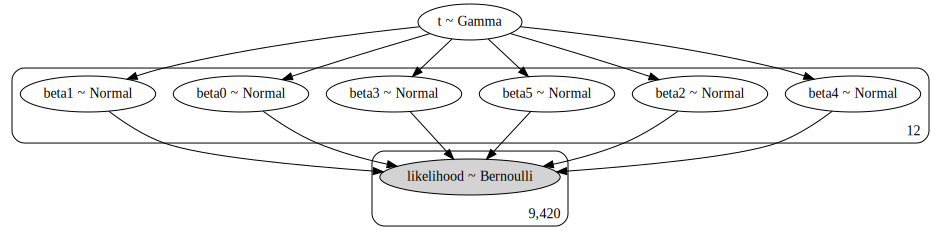

In [21]:
from pymc3 import Model, sample, Normal, HalfCauchy, Uniform, model_to_graphviz
with pm.Model() as model_weight:
    
    t=pm.Gamma('t',alpha=.0001,beta=.0001)
    
    beta0 = pm.Normal('beta0', mu=0, tau=t,shape=nclase)
    beta1 = pm.Normal('beta1', mu=0, tau=t,shape=nclase)
    beta2 = pm.Normal('beta2', mu=0, tau=t,shape=nclase)
    beta3 = pm.Normal('beta3', mu=0, tau=t,shape=nclase)
    beta4 = pm.Normal('beta4', mu=0, tau=t,shape=nclase)
    beta5 = pm.Normal('beta5', mu=0, tau=t,shape=nclase)
    #beta6 = pm.Normal('beta6', mu=0, tau=t,shape=nclase)
            
        
    p = pm.invlogit(beta0[clase_idx-1] + beta1[clase_idx-1]*zX[:,0]+beta2[clase_idx-1]*zX[:,1]
                    +beta3[clase_idx-1]*zX[:,2]+beta4[clase_idx-1]*zX[:,3]+
                   beta5[clase_idx-1]*zX[:,4])#+beta6[clase_idx-1]*zX[:,5])
        
    likelihood = pm.Bernoulli('likelihood', p, observed=y.values)
    
    #posterior=pm.Deterministic('posterior',likelihood*1)

model_to_graphviz(model_weight)

In [22]:
from IPython.display import display
import ipyparallel as ipp
from ipyparallel.error import TimeoutError

rc = ipp.Client()
view = rc[:]
view.block = True

/home/abraham/anaconda3/lib/python3.6/site-packages/ipyparallel/client/client.py:459: RuntimeWarning: 
            Controller appears to be listening on localhost, but not on this machine.
            If this is true, you should specify Client(...,sshserver='you@Lenovo-ideapad-700-15ISK')
            or instruct your controller to listen on an external IP.
  RuntimeWarning)


In [23]:
%%time
%px
with model_weight:
    trace1 = pm.sample(50000,tune=5000,chains=2,cores=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [beta5, beta4, beta3, beta2, beta1, beta0, t]
Sampling 2 chains:  16%|█▌        | 17608/110000 [11:30:27<87:09:52,  3.40s/draws] 
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


CPU times: user 38.9 s, sys: 5.27 s, total: 44.2 s
Wall time: 11h 30min 41s


# 

14min 44s

In [38]:
sal=pm.summary(trace1) 
sal

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
beta0__0,-4.646258,0.333992,0.001090,-5.310770,-4.013716,75605.711889,0.999997
beta0__1,-5.025423,0.301364,0.001006,-5.631914,-4.457622,71829.556109,0.999991
beta0__2,-4.654465,0.396369,0.001645,-5.433178,-3.891527,52235.734170,1.000010
beta0__3,-5.032114,0.427708,0.001446,-5.879222,-4.221796,66780.032952,1.000002
beta0__4,-4.923495,0.396433,0.001475,-5.725421,-4.179434,58273.274236,1.000031
beta0__5,-5.930690,0.732906,0.003877,-7.403642,-4.567548,41811.619953,1.000043
beta0__6,-4.354825,0.573916,0.002425,-5.467226,-3.241774,63659.731099,0.999994
beta0__7,-5.365302,0.698334,0.002560,-6.739043,-4.058235,52678.046527,0.999994
beta0__8,-4.707012,0.380878,0.001340,-5.463741,-3.984182,60608.387741,0.999992
beta0__9,-4.746697,0.409070,0.001733,-5.572594,-3.984485,60452.831787,1.000022


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f17954d5e10>,
      dtype=object)

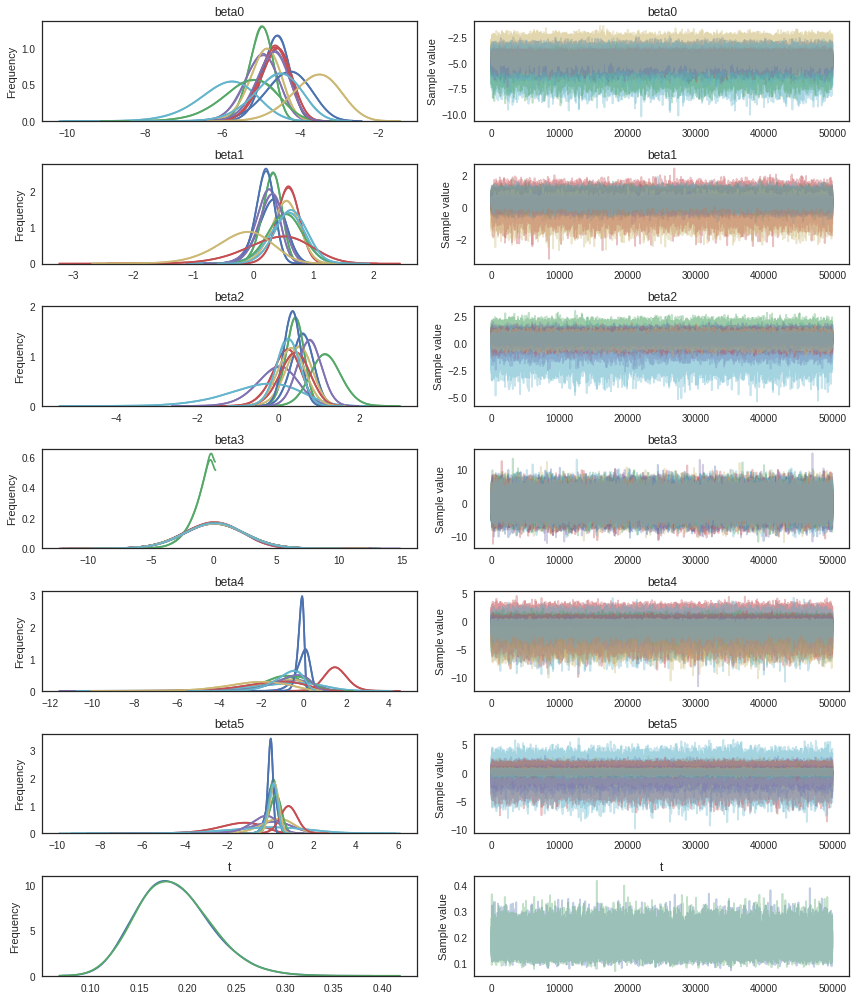

In [39]:
pm.traceplot(trace1)

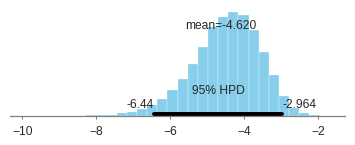

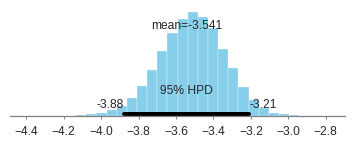

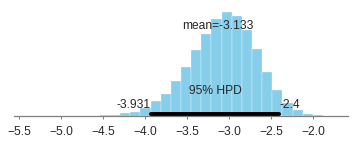

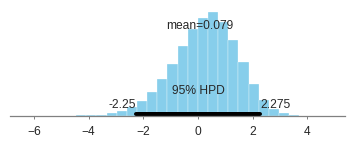

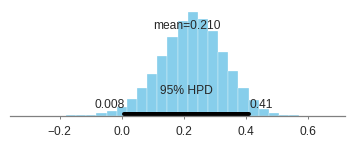

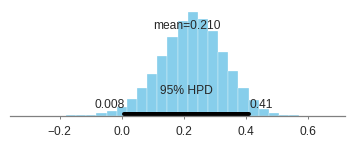

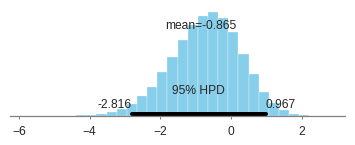

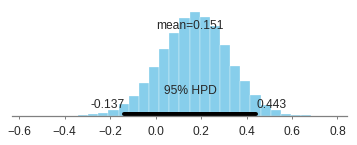

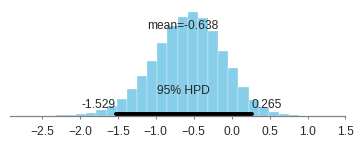

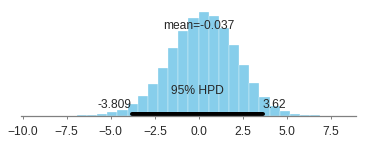

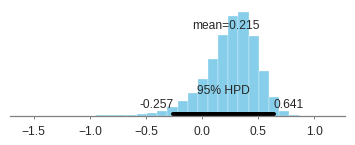

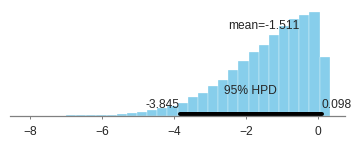

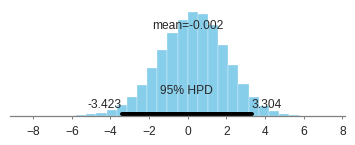

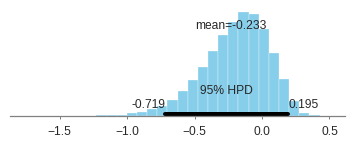

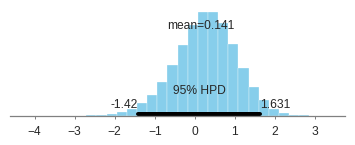

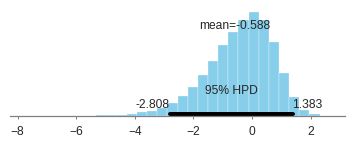

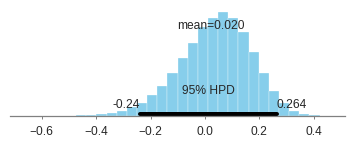

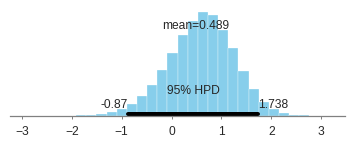

In [196]:
#'state','cardholder','balance','numTrans','numIntlTrans','creditLine'
pm.plot_posterior(trace1['beta0'][:,0])
pm.plot_posterior(trace1['beta0'][:,1])
pm.plot_posterior(trace1['beta0'][:,2])
pm.plot_posterior(trace1['beta1'][:,0])
pm.plot_posterior(trace1['beta1'][:,1])
pm.plot_posterior(trace1['beta1'][:,1])
pm.plot_posterior(trace1['beta2'][:,0])
pm.plot_posterior(trace1['beta2'][:,1])
pm.plot_posterior(trace1['beta2'][:,2])
pm.plot_posterior(trace1['beta3'][:,0])
pm.plot_posterior(trace1['beta3'][:,1])
pm.plot_posterior(trace1['beta3'][:,2])
pm.plot_posterior(trace1['beta4'][:,0])
pm.plot_posterior(trace1['beta4'][:,1])
pm.plot_posterior(trace1['beta4'][:,2])
pm.plot_posterior(trace1['beta5'][:,0])
pm.plot_posterior(trace1['beta5'][:,1])
pm.plot_posterior(trace1['beta5'][:,2])
#pm.plot_posterior(trace1['beta6'][:,0])
#pm.plot_posterior(trace1['beta6'][:,1])
#pm.plot_posterior(trace1['beta6'][:,2])
plt.show()

In [40]:
from math import*
def invlogit(x):
    return exp(x) / (1 + exp(x))

def predict(zX,clase_idx):
    p = trace1['beta0'][:,clase_idx-1].mean() + trace1['beta1'][:,clase_idx-1].mean()*zX[:,0]+trace1['beta2'][:,clase_idx-1].mean()*zX[:,1]+trace1['beta3'][:,clase_idx-1].mean()*zX[:,2]+trace1['beta4'][:,clase_idx-1].mean()*zX[:,3]+trace1['beta5'][:,clase_idx-1].mean()*zX[:,4]#+trace1['beta6'][:,clase_idx-1].mean()*zX[:,5]
    p=np.array([invlogit(i) for i in p])
    return(p)

In [41]:
def predict(w):
    p = trace1['beta0'][:,int(w[5])-1].mean() + trace1['beta1'][:,int(w[5])-1].mean()*w[0]
    +trace1['beta2'][:,int(w[5])-1].mean()*w[1]
    +trace1['beta3'][:,int(w[5])-1].mean()*w[2]
    +trace1['beta4'][:,int(w[5])-1].mean()*w[3]
    +trace1['beta5'][:,int(w[5])-1].mean()*w[4]
    p=invlogit(p)
    return(p)

In [42]:
test=pd.DataFrame(X_test,columns=[['TO_PROM_TO_CARGOS_3M','NU_VINC_COGNODATA','TO_NECESIDAD_FINAN_CAP_3M',
        'IM_PROM_GASTOS_3M','IM_SUM_SDO_CORTE_1M']])

test.head()

,TO_PROM_TO_CARGOS_3M,NU_VINC_COGNODATA,TO_NECESIDAD_FINAN_CAP_3M,IM_PROM_GASTOS_3M,IM_SUM_SDO_CORTE_1M
0,0.330656,2.177541,-0.012907,-0.156724,-0.274691
1,-0.072996,0.017390,-0.013337,-0.161937,-0.274691
2,-0.611199,-0.702661,-0.013689,-0.161068,-0.274691
3,0.397932,2.537566,-0.013690,-0.121426,-0.274691
4,-0.678474,-0.342635,-0.013690,-0.142377,0.099725


In [43]:
def cate(i):
    r=test.iloc[i,:].values
    return(r)
#%%time
%px
test['Seg']=c_test.values
%px
test['i']=test.index
%px
test['w']=test['i'].apply(lambda x: cate(x))
%px
test['pf']=test['w'].apply(lambda x: predict(x))
%px
test.head()



#pf=predict(X_test,c_test.values)
#test['pf']=predict(test,c_test.values)
#X_test[0,:]
#c_test.values[0]
#pf


,TO_PROM_TO_CARGOS_3M,NU_VINC_COGNODATA,TO_NECESIDAD_FINAN_CAP_3M,IM_PROM_GASTOS_3M,IM_SUM_SDO_CORTE_1M,Seg,i,w,pf
0,0.330656,2.177541,-0.012907,-0.156724,-0.274691,7,0,"[0.3306562845227469, 2.1775407650200433, -0.01...",0.013469
1,-0.072996,0.017390,-0.013337,-0.161937,-0.274691,1,1,"[-0.07299591533518107, 0.017389750734253903, -...",0.009303
2,-0.611199,-0.702661,-0.013689,-0.161068,-0.274691,10,2,"[-0.6111988484757213, -0.7026605873610092, -0....",0.007242
3,0.397932,2.537566,-0.013690,-0.121426,-0.274691,11,3,"[0.3979316511993727, 2.5375659340676746, -0.01...",0.024051
4,-0.678474,-0.342635,-0.013690,-0.142377,0.099725,2,4,"[-0.6784742151220731, -0.3426354183133776, -0....",0.005338


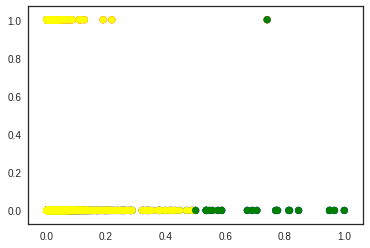

In [44]:
%px
plt.scatter(test['pf'],y_test,color=['red' if i==1 else 'blue' for i in y_test])
%px
plt.scatter(test['pf'],y_test,color=['green' if i>=0.5 else 'yellow' for i in test['pf']])
#plt.plot(pf,'p',color='red')

In [45]:
np.mean(y_test)

0.014200122658866821

In [49]:
from sklearn.metrics import confusion_matrix,classification_report
pred=[1 if i>=0.025 else 0 for i in test['pf']]
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          0       0.99      0.97      0.98     83584
          1       0.03      0.07      0.04      1204

avg / total       0.97      0.95      0.96     84788

[[80848  2736]
 [ 1117    87]]


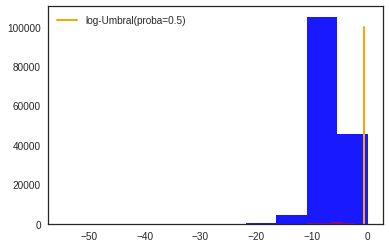

In [144]:
pf=np.array(test['pf'])
plt.hist(np.array([log(i) for i in pf[np.where(y_test==0)]]),color='blue',alpha=0.9)
plt.hist(np.array([log(i) for i in pf[np.where(y_test==1)]]),color='red',alpha=0.5)
plt.plot([-0.6931471805599453, -0.6931471805599453], [0, 100000], 'r-',label='log-Umbral(proba=0.5)',linewidth=2,color='orange')
plt.legend()

In [204]:
log(0.5)

-0.6931471805599453

In [45]:
ppc['likelihood'][0]

array([0, 0, 0, ..., 0, 0, 0])

100%|██████████| 100/100 [00:06<00:00, 16.55it/s]


TypeError: slice indices must be integers or None or have an __index__ method

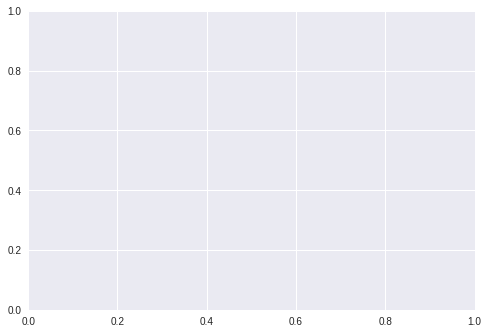

In [19]:
import seaborn as sns; sns.set()
ppc=pm.sample_ppc(trace1, model=model_weight, samples=100)
sns.kdeplot(y,c='b')
for i in range(100):
    sns.kdeplot(ppc['likelihood'][:,i], alpha=0.1, c='g')

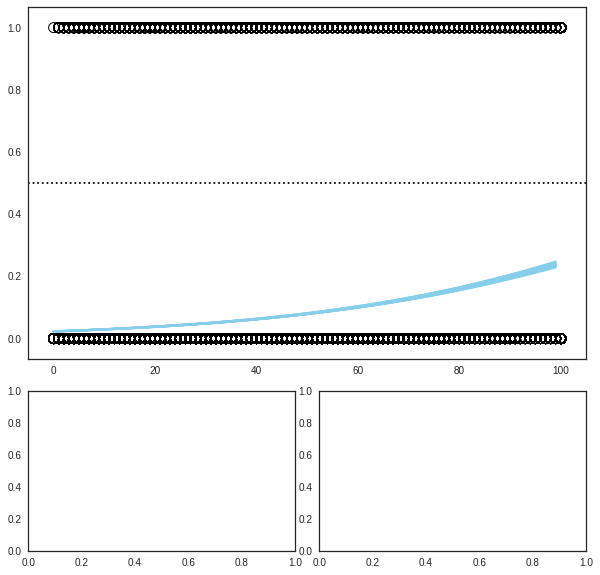

In [66]:
# Transform parameters back to original scale
beta0 = trace1['beta0'] - trace1['zbetaj']*meanx[1]/scalex[1]
betaj = (trace1['betaj']/scalex[1])

plt.figure(figsize=(10,10))
# Define gridspec
gs = gridspec.GridSpec(3, 4)
ax1 = plt.subplot(gs[:2,:4])
ax2 = plt.subplot(gs[2,:2])
ax3 = plt.subplot(gs[2,2:])

ax1.scatter(df.numTrans, df.fraudRisk, s=100, edgecolor='k', facecolors='None', lw=1)

# Take 20 values from the posterior distribution and plot the lines
n_curves = 20
tr_len = len(trace1)
stepIdxVec = np.arange(0, tr_len, tr_len//n_curves)
weight_span = np.arange(df.numTrans.min(), df.numTrans.max())
weights = np.tile(weight_span.reshape(-1,1), (1,n_curves))
# The expit function from scipy.special calculates the inverse of the logit function
p = expit(beta0[stepIdxVec] + betaj[stepIdxVec]*weights)
ax1.plot(weights, p, c=color)

ax1.axhline(y=0.5, color='k', linestyle='dotted')



In [71]:
# Look up weights for which of the posterior probabilities is (close to) 0.5
decision_boundary = weight_span[np.any(np.isclose(p, 0.1, atol=0.01), axis=1)]
# Highlight the weightspan
ax1.axvspan(decision_boundary.min(), decision_boundary.max(),
            0, 0.5, color=color, alpha=0.3)

ax1.set_xlabel('numTrans')
ax1.set_ylabel('fraudRisk')
ax1.set_title('Data with Post. Pred.')

pm.plot_posterior(beta0, point_estimate='mode', ax=ax2, color=color)
ax2.set_title('Intercept', fontdict=f_dict)
ax2.set_xlabel(r'$\beta_0$', fontdict=f_dict)

pm.plot_posterior(betaj, point_estimate='mode', ax=ax3, color=color)
ax3.set_title('numTrans', fontdict=f_dict)
ax3.set_xlabel(r'$\beta_1$', fontdict=f_dict);

plt.tight_layout();

In [77]:
import pydot
from pydot import*
print (pydot.find_graphviz())

AttributeError: module 'pydot' has no attribute 'find_graphviz'